In [1]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/train.csv').drop('ID',axis=1)
test = pd.read_csv('./data/test.csv').drop('ID',axis=1)
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.head(2)

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        84406 non-null  int64  
 1   요일       84406 non-null  object 
 2   시간       84406 non-null  int64  
 3   소관경찰서    84406 non-null  int64  
 4   소관지역     84406 non-null  float64
 5   사건발생거리   84406 non-null  float64
 6   강수량(mm)  84406 non-null  float64
 7   강설량(mm)  84406 non-null  float64
 8   적설량(cm)  84406 non-null  float64
 9   풍향       84406 non-null  float64
 10  안개       84406 non-null  float64
 11  짙은안개     84406 non-null  float64
 12  번개       84406 non-null  float64
 13  진눈깨비     84406 non-null  float64
 14  서리       84406 non-null  float64
 15  연기/연무    84406 non-null  float64
 16  눈날림      84406 non-null  float64
 17  범죄발생지    84406 non-null  object 
 18  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(2)
memory usage: 12.2+ MB


In [5]:
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
# 요일, 범죄발생지(문자열 값) 랭크 인코딩
week = train['요일'].value_counts(ascending=True)
key = week.index
val = week.values

wre = {}

# 요일 랭크 인코딩
for i in range(len(key)):
    wre[key[i]] = i

print(wre)

{'목요일': 0, '수요일': 1, '화요일': 2, '월요일': 3, '금요일': 4, '일요일': 5, '토요일': 6}


In [9]:
train['요일'] = train['요일'].map(wre)
test['요일'] = test['요일'].map(wre)

In [14]:
crime = train['범죄발생지'].value_counts(ascending=True)

key = crime.index
val = crime.values

wre = {}

# 요일 랭크 인코딩
for i in range(len(key)):
    wre[key[i]] = i

print(wre)

{'은행': 0, '병원': 1, '호텔/모텔': 2, '약국': 3, '학교': 4, '공원': 5, '주유소': 6, '백화점': 7, '식당': 8, '주차장': 9, '편의점': 10, '인도': 11, '차도': 12, '주거지': 13}


In [15]:
train['범죄발생지'] = train['범죄발생지'].map(wre)
test['범죄발생지'] = test['범죄발생지'].map(wre)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        84406 non-null  int64  
 1   요일       84406 non-null  int64  
 2   시간       84406 non-null  int64  
 3   소관경찰서    84406 non-null  int64  
 4   소관지역     84406 non-null  float64
 5   사건발생거리   84406 non-null  float64
 6   강수량(mm)  84406 non-null  float64
 7   강설량(mm)  84406 non-null  float64
 8   적설량(cm)  84406 non-null  float64
 9   풍향       84406 non-null  float64
 10  안개       84406 non-null  float64
 11  짙은안개     84406 non-null  float64
 12  번개       84406 non-null  float64
 13  진눈깨비     84406 non-null  float64
 14  서리       84406 non-null  float64
 15  연기/연무    84406 non-null  float64
 16  눈날림      84406 non-null  float64
 17  범죄발생지    84406 non-null  int64  
 18  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(6)
memory usage: 12.2 MB


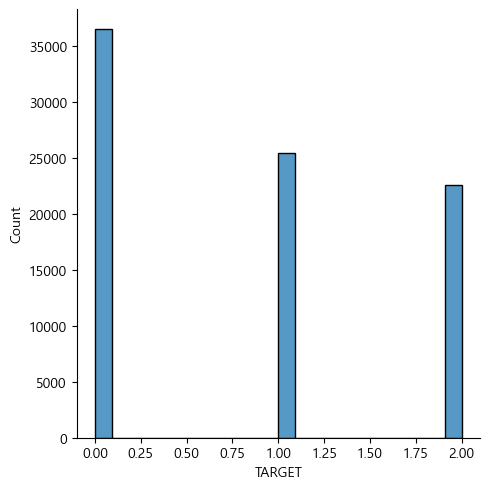

In [14]:
sns.displot(train['TARGET'])

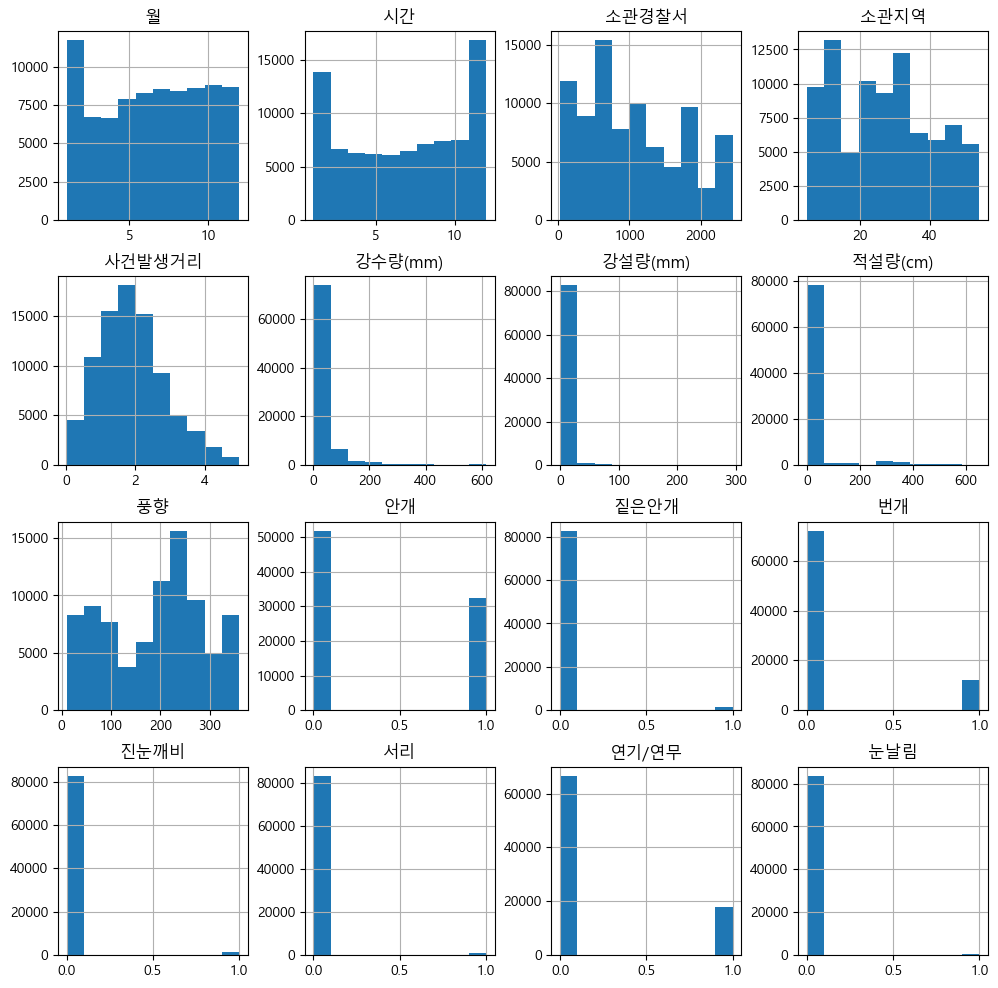

In [15]:
except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

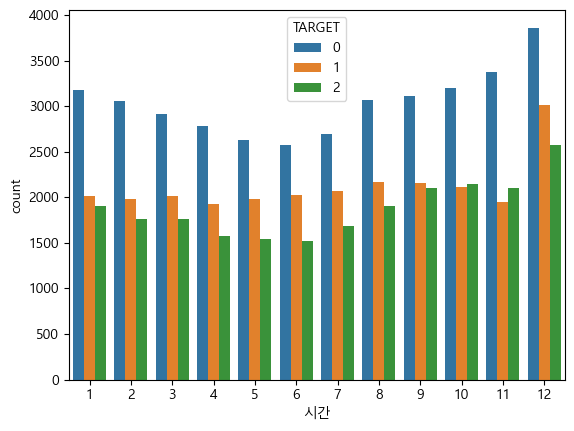

In [16]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

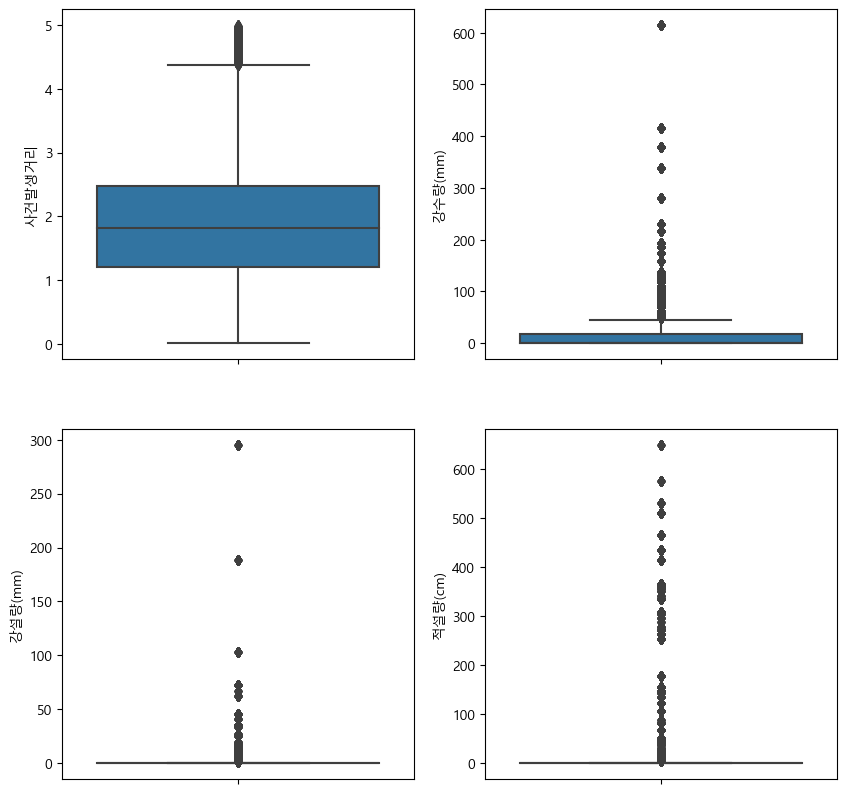

In [17]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

In [18]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

ValueError: could not convert string to float: '화요일'

<Figure size 1500x1500 with 0 Axes>